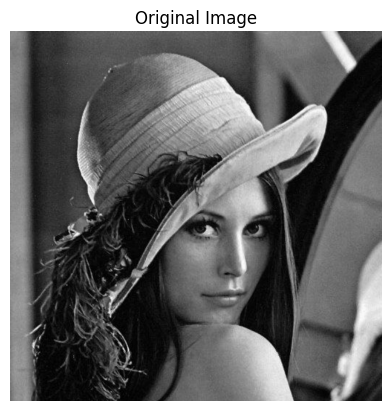

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/Screenshot 2025-01-21 111933.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [ ]:
h, w, c = img.shape
total_pixels = h * w

print(f"Image Size: {w}x{h}")
print(f"Total Pixels: {total_pixels}")


Image Size: 640x636
Total Pixels: 407040


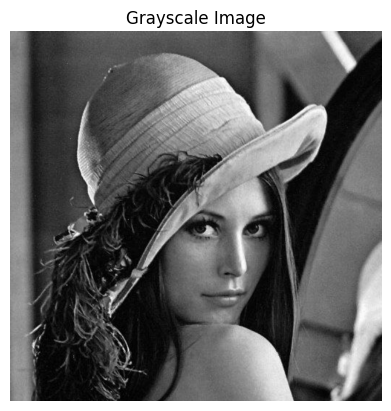

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imwrite("image_gray.jpg", gray)

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()


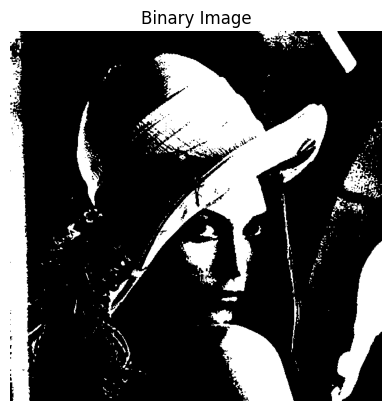

Black Pixel Count: 311459


In [ ]:
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

black_pixels = np.sum(binary == 0)

cv2.imwrite("image_binary.jpg", binary)

plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.title("Binary Image")
plt.show()

print(f"Black Pixel Count: {black_pixels}")


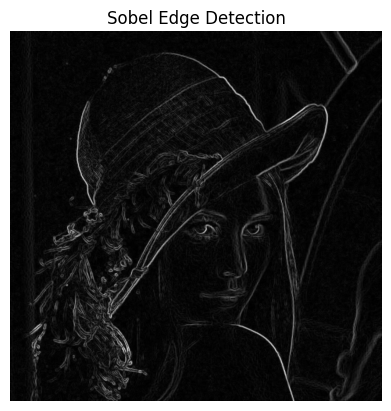

In [ ]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

plt.imshow(sobel, cmap="gray")
plt.axis("off")
plt.title("Sobel Edge Detection")
plt.show()


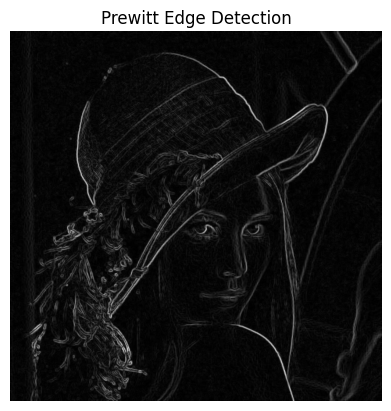

In [ ]:
kernelx = np.array([[-1,0,1], [-1,0,1], [-1,0,1]], dtype=np.float32)
kernely = np.array([[1,1,1], [0,0,0], [-1,-1,-1]], dtype=np.float32)

prewittx = cv2.filter2D(gray, cv2.CV_32F, kernelx)
prewitty = cv2.filter2D(gray, cv2.CV_32F, kernely)

prewitt = cv2.magnitude(prewittx, prewitty)

plt.imshow(prewitt, cmap="gray")
plt.axis("off")
plt.title("Prewitt Edge Detection")
plt.show()


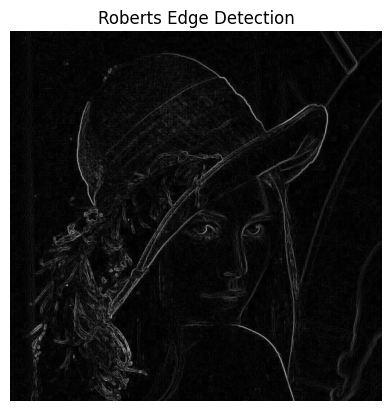

In [ ]:
# Roberts Cross Operator Kernels
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

# Apply Roberts Cross Operator
robertsx = cv2.filter2D(gray, cv2.CV_32F, roberts_x)
robertsy = cv2.filter2D(gray, cv2.CV_32F, roberts_y)

# Compute magnitude
roberts = cv2.magnitude(robertsx, robertsy)

plt.imshow(roberts, cmap="gray")
plt.axis("off")
plt.title("Roberts Edge Detection")
plt.show()


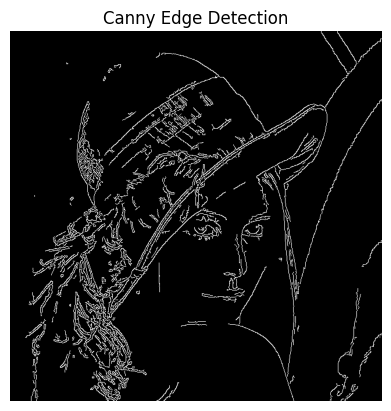

In [ ]:
# Apply Canny Edge Detection
canny_edges = cv2.Canny(gray, 100, 200)

plt.imshow(canny_edges, cmap="gray")
plt.axis("off")
plt.title("Canny Edge Detection")
plt.show()


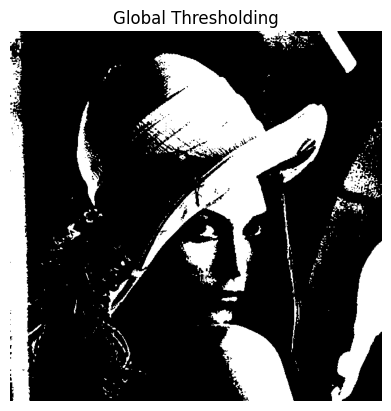

In [ ]:
# Apply Global Thresholding
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(global_thresh, cmap="gray")
plt.axis("off")
plt.title("Global Thresholding")
plt.show()


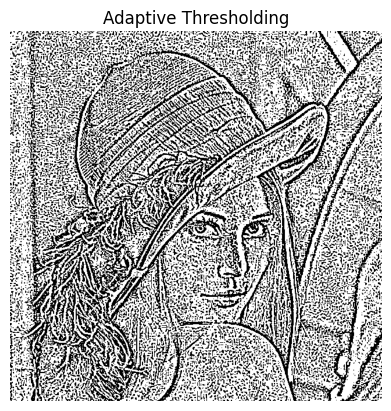

In [ ]:
# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

plt.imshow(adaptive_thresh, cmap="gray")
plt.axis("off")
plt.title("Adaptive Thresholding")
plt.show()


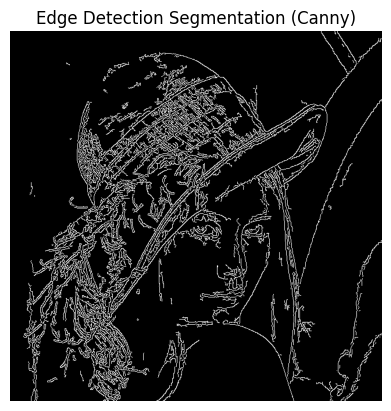

In [ ]:
# Apply Canny Edge Detection for segmentation
canny_segment = cv2.Canny(gray, 50, 150)

plt.imshow(canny_segment, cmap="gray")
plt.axis("off")
plt.title("Edge Detection Segmentation (Canny)")
plt.show()


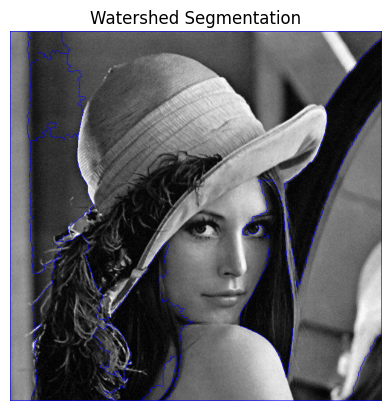

In [ ]:
# Convert to grayscale and apply threshold
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using Morphological Transformations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all markers so that the unknown region is 0
markers = markers + 1
markers[unknown == 255] = 0

# Apply the Watershed Algorithm
image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Watershed Segmentation")
plt.show()
